<a href="https://colab.research.google.com/github/selvamani1992/Churn_Prediction/blob/master/customer_churn_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import make_scorer, r2_score, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

**Loading the Dataset**

In [3]:
df = pd.read_excel('/content/customer_churn_large_dataset.xlsx')

In [4]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


**Removing unwanted columns**

In [5]:
#remove customer id and name columns
df.drop(['CustomerID','Name'],axis=1,inplace=True)
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [7]:
df.describe()

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,12.490100,65.053197,274.393650,0.497790
std,15.280283,6.926461,20.230696,130.463063,0.499998
min,18.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,24.000000,100.000000,500.000000,1.000000


As per above describe information, none of the columns has null values or outliers

In [8]:
#duplicate rows
df.duplicated().sum()

0

In [9]:
df.Gender.value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [10]:
df.Location.value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [11]:
#Churn
df.Churn.value_counts()

0    50221
1    49779
Name: Churn, dtype: int64

In [12]:
# Gender wise Churn value counts
for i in df['Gender'].unique():
  print(i)
  print(df[df['Gender']==i]['Churn'].value_counts())

Male
0    24949
1    24835
Name: Churn, dtype: int64
Female
0    25272
1    24944
Name: Churn, dtype: int64


In [13]:
# Location wise Churn value counts
for loc in df['Location'].unique():
  print(loc)
  print(df[df['Location']==loc]['Churn'].value_counts())


Los Angeles
0    10161
1     9880
Name: Churn, dtype: int64
New York
1    9979
0    9834
Name: Churn, dtype: int64
Miami
1    10076
0     9955
Name: Churn, dtype: int64
Chicago
0    10013
1     9945
Name: Churn, dtype: int64
Houston
0    10258
1     9899
Name: Churn, dtype: int64


In [14]:
# Gender-Location wise Churn value counts
for i in df['Gender'].unique():
  for loc in df['Location'].unique():
    print('Gender: ',i,' Location: ',loc)
    print(df[(df['Location']==loc)&(df['Gender']==i)]['Churn'].value_counts())


Gender:  Male  Location:  Los Angeles
0    4998
1    4952
Name: Churn, dtype: int64
Gender:  Male  Location:  New York
1    4984
0    4827
Name: Churn, dtype: int64
Gender:  Male  Location:  Miami
0    4971
1    4970
Name: Churn, dtype: int64
Gender:  Male  Location:  Chicago
0    4974
1    4948
Name: Churn, dtype: int64
Gender:  Male  Location:  Houston
0    5179
1    4981
Name: Churn, dtype: int64
Gender:  Female  Location:  Los Angeles
0    5163
1    4928
Name: Churn, dtype: int64
Gender:  Female  Location:  New York
0    5007
1    4995
Name: Churn, dtype: int64
Gender:  Female  Location:  Miami
1    5106
0    4984
Name: Churn, dtype: int64
Gender:  Female  Location:  Chicago
0    5039
1    4997
Name: Churn, dtype: int64
Gender:  Female  Location:  Houston
0    5079
1    4918
Name: Churn, dtype: int64


*  There is no null, missing values, outliers and duplicate values, so no need to clean the data <br>
*  Dataset is very balanced, so no need to balance the data <br>
*  Dataset is almost equal based on all categories <br>

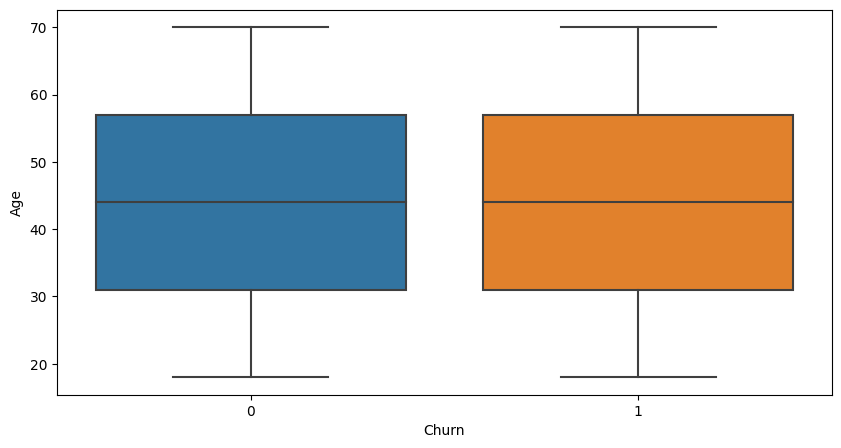

In [15]:
#visualize churn vs age
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn',y='Age',data=df)
plt.show()

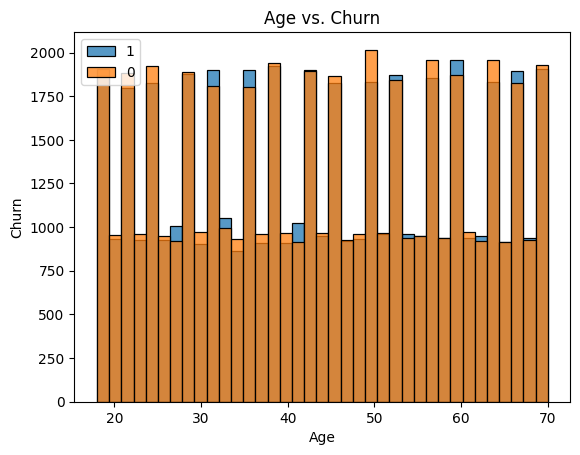

In [16]:
df_Churn0 = df[df['Churn'] == 0]
df_Churn1 = df[df['Churn'] == 1]

sns.histplot(df_Churn1['Age'], label='1', kde=False)
sns.histplot(df_Churn0['Age'], label='0', kde=False)
plt.xlabel('Age')
plt.ylabel('Churn')
plt.title('Age vs. Churn')
plt.legend()
plt.show()

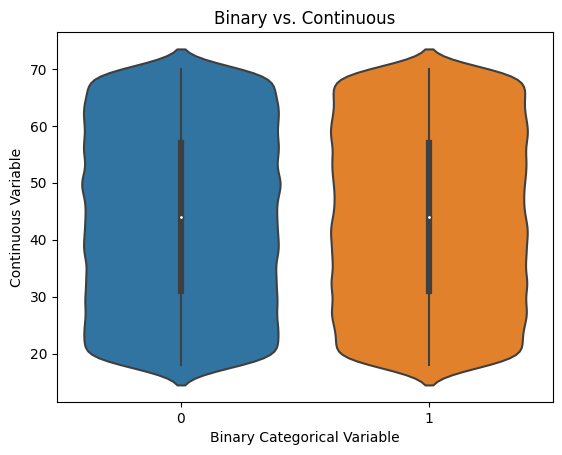

In [17]:
sns.violinplot(x='Churn', y='Age', data=df)
plt.xlabel('Binary Categorical Variable')
plt.ylabel('Continuous Variable')
plt.title('Binary vs. Continuous')
plt.show()

<Axes: xlabel='Location', ylabel='count'>

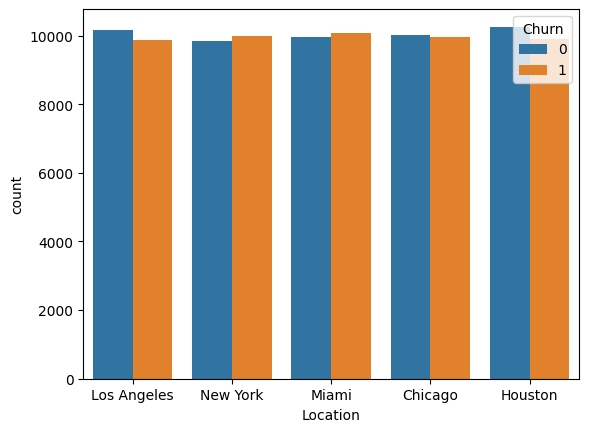

In [18]:
sns.countplot(x='Location', data=df, hue='Churn')

<Axes: xlabel='Gender', ylabel='count'>

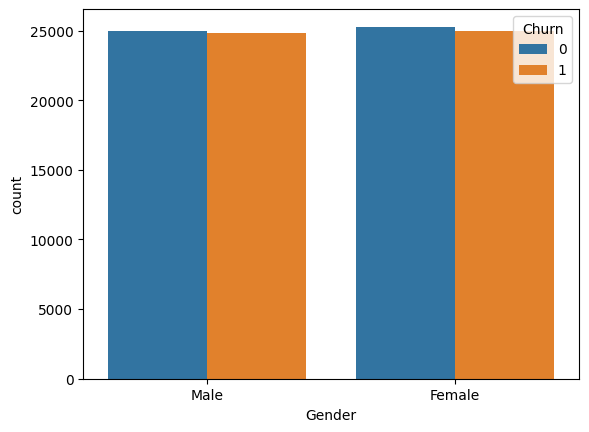

In [19]:
sns.countplot(x='Gender', data=df, hue='Churn')

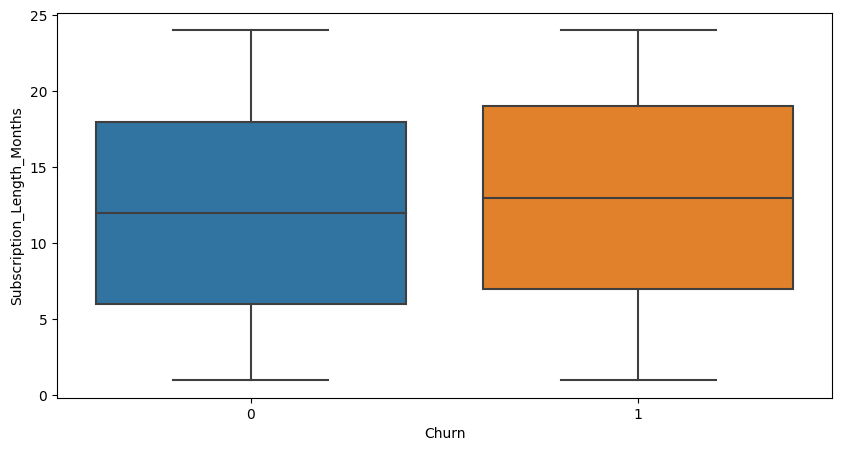

In [20]:
#visualize churn vs age
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn',y='Subscription_Length_Months',data=df)
plt.show()

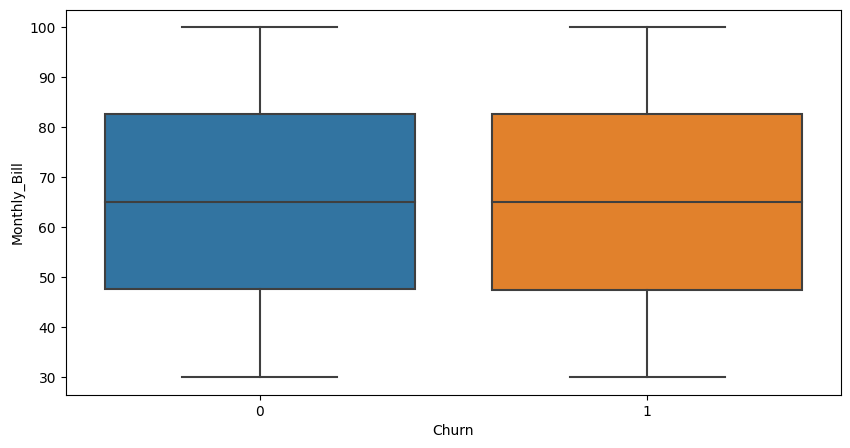

In [21]:
#visualize churn vs age
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn',y='Monthly_Bill',data=df)
plt.show()

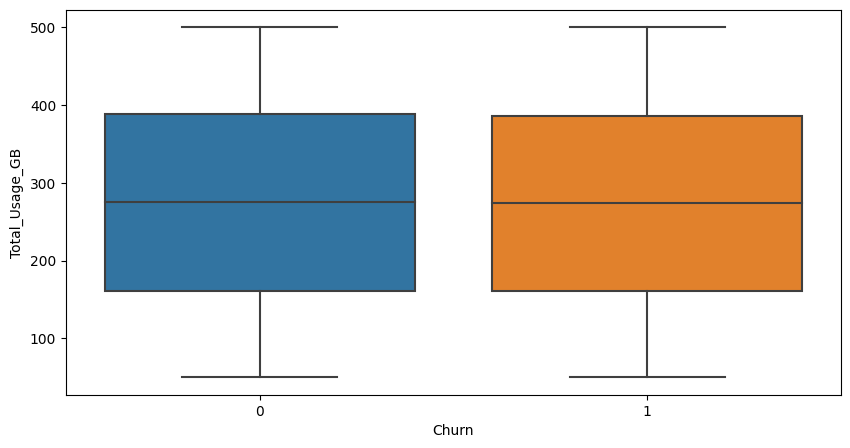

In [22]:
#visualize churn vs age
plt.figure(figsize=(10,5))
sns.boxplot(x='Churn',y='Total_Usage_GB',data=df)
plt.show()

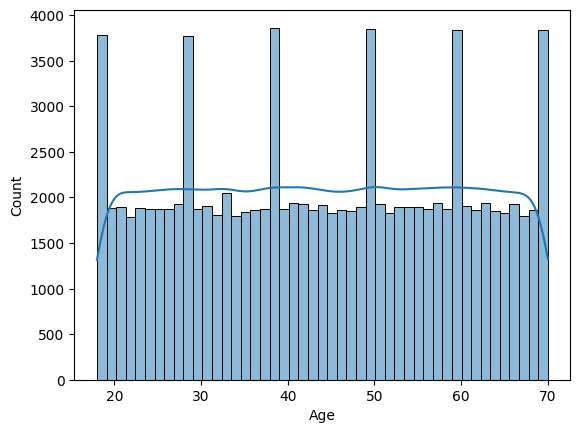

In [23]:
#Histogram to visualize the distribution of the age variable
sns.histplot(df['Age'], kde=True)
plt.show()

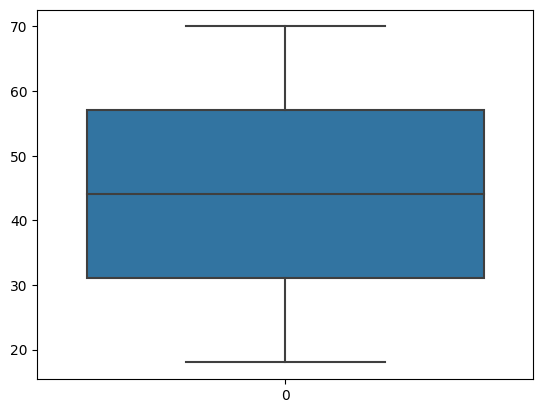

In [24]:
#Boxplot to visualize the distribution of the age variable
sns.boxplot(df['Age'])
plt.show()

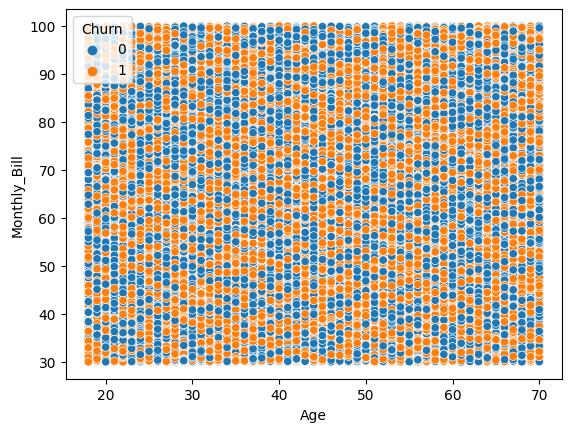

In [25]:
#Scatter plot with Age on one axis and another continuous variable (e.g., Monthly_Bill) on the other axis to explore relationships.
sns.scatterplot(x='Age', y='Monthly_Bill', data=df, hue='Churn')
plt.show()

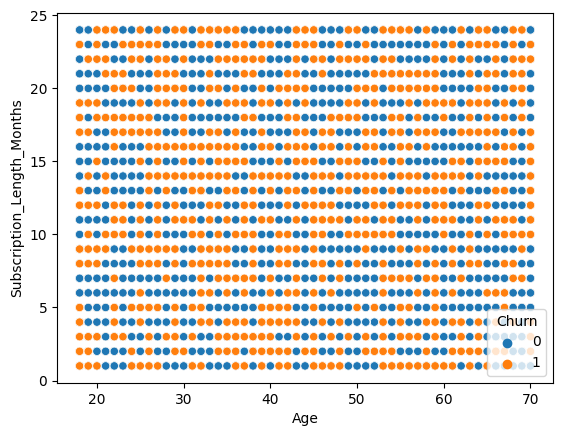

In [26]:
sns.scatterplot(x='Age', y='Subscription_Length_Months', data=df, hue='Churn')
plt.show()

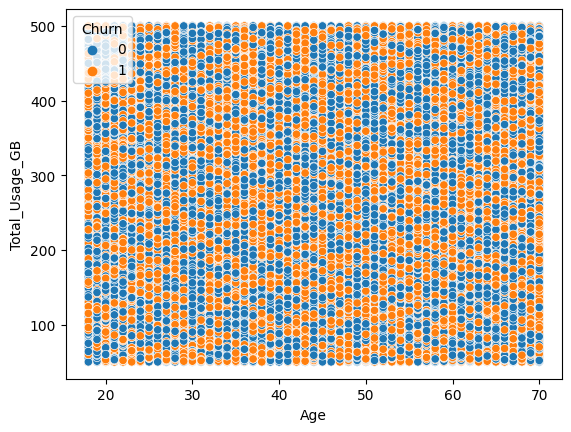

In [27]:
sns.scatterplot(x='Age', y='Total_Usage_GB', data=df, hue='Churn')
plt.show()

<Axes: >

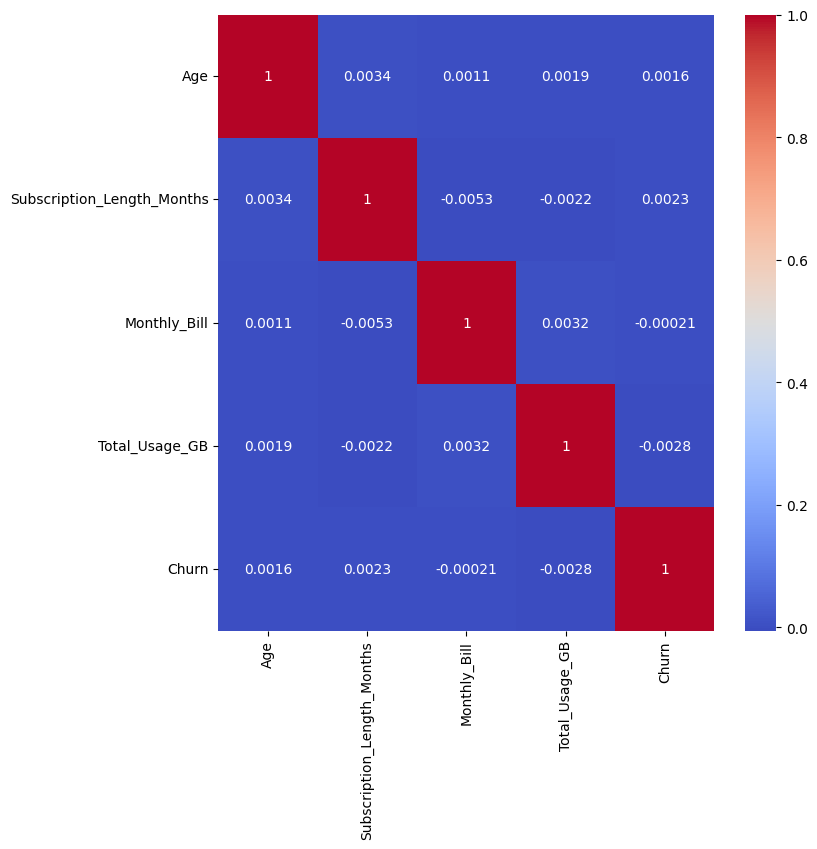

In [28]:
plt.figure(figsize=(8,8))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')

In [29]:
#encode gender variables
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [30]:
#get dummy variables on location
df = pd.get_dummies(df, columns=['Location'])
df.head()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,63,1,17,73.36,236,0,0,0,1,0,0
1,62,0,1,48.76,172,0,0,0,0,0,1
2,24,0,5,85.47,460,0,0,0,1,0,0
3,36,0,3,97.94,297,1,0,0,0,1,0
4,46,0,19,58.14,266,0,0,0,0,1,0


In [31]:
df.describe()

,Age,Gender,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.497840,12.490100,65.053197,274.393650,0.497790,0.199580,0.201570,0.200410,0.200310,0.198130
std,15.280283,0.499998,6.926461,20.230696,130.463063,0.499998,0.399687,0.401175,0.400309,0.400234,0.398593
min,18.000000,0.000000,1.000000,30.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,6.000000,47.540000,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,0.000000,12.000000,65.010000,274.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,1.000000,19.000000,82.640000,387.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,70.000000,1.000000,24.000000,100.000000,500.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df.columns

Index(['Age', 'Gender', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn', 'Location_Chicago', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York'],
      dtype='object')

In [33]:
scoring = {
    'AUC_ROC': make_scorer(roc_auc_score),
    'f1_score': make_scorer(f1_score),
    'Accuracy': make_scorer(accuracy_score),
    'Precision': make_scorer(precision_score),
    'Recall': make_scorer(recall_score)
}

In [34]:
score_list= []

###Feature Importance

**With all features**

In [35]:
def feat_imp(cols):
    X, y = df.drop(cols, axis=1), df['Churn']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lgr = LogisticRegression()
    lgr.fit(X_train, y_train)
    y_pred = lgr.predict(X_test)
    print('Accuracy:',accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    #logistic regression feature importance
    feature_importance = pd.Series(lgr.coef_[0],index=X.columns)
    feature_importance.sort_values(ascending=False)
    feature_importance.sort_values(ascending=False).plot(kind='bar')

Accuracy: 0.49955
[[5812 4254]
 [5755 4179]]


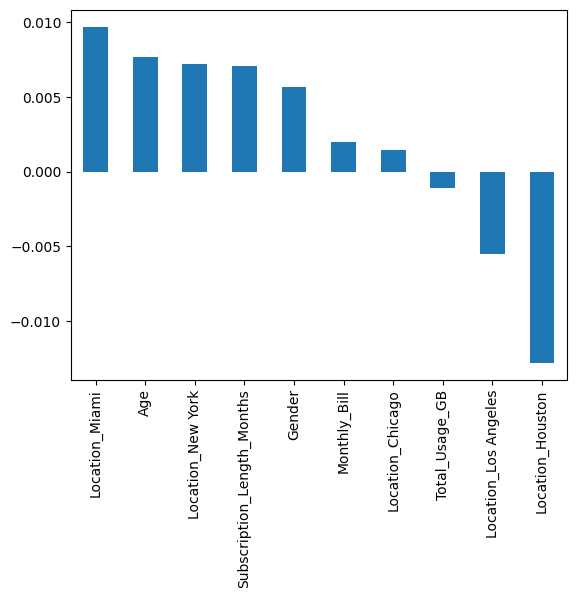

In [36]:
cols = ['Churn']
feat_imp(cols)

Accuracy: 0.4937
[[9183  747]
 [9379  691]]


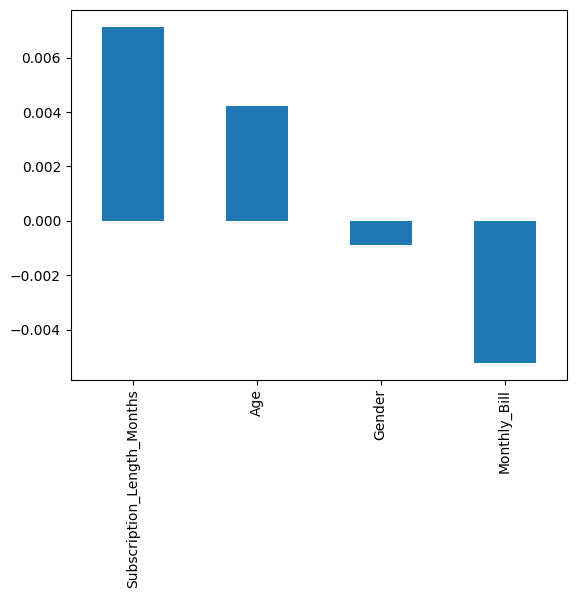

In [37]:
cols = ['Total_Usage_GB', 'Churn', 'Location_Chicago', 'Location_Houston',
       'Location_Los Angeles', 'Location_Miami', 'Location_New York']
feat_imp(cols)

Accuracy: 0.50435
[[5779 4285]
 [5628 4308]]


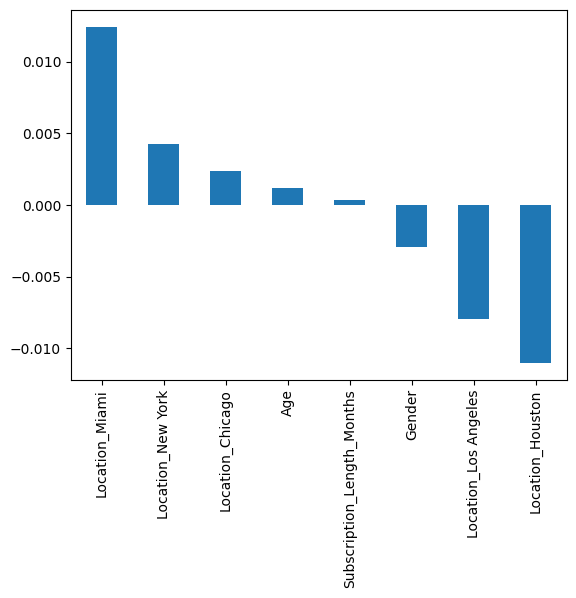

In [38]:
cols = ['Total_Usage_GB', 'Churn', 'Monthly_Bill']
feat_imp(cols)

Accuracy: 0.4969
[[7159 2882]
 [7180 2779]]


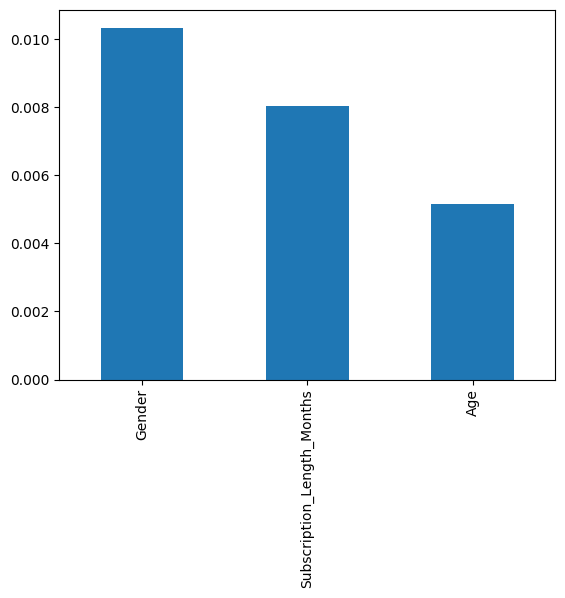

In [39]:
cols = ['Total_Usage_GB', 'Churn', 'Monthly_Bill','Location_Chicago', 'Location_Houston', 'Location_Los Angeles', 'Location_Miami', 'Location_New York']
feat_imp(cols)

In [40]:
X, y = df.drop(['Churn'], axis=1), df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train[0]

array([ 0.71859955, -0.99678018, -0.64865538, -1.59359508, -0.58496738,
       -0.49912094, -0.50265486, -0.50140586,  1.99765927, -0.49622757])

**Decision Tree** <br>

along with hyperparameter tuning

In [42]:
best_depth = best_score = 0
for depth in [1,2,3,4,5,6,7,8,9,10,20,30]:
  dt = DecisionTreeClassifier(max_depth=depth)
  score = np.mean(cross_val_score(dt,X_train, y_train, cv = 10, scoring = 'accuracy'))
  print("Depth Level : ", depth, "test score : ", score)
  if best_score < score:
    best_score = score
    best_depth = depth
print(f'\n\n\n best Depth : {best_depth} with the score of {best_score}')

Depth Level :  1 test score :  0.5024750000000001
Depth Level :  2 test score :  0.5017625
Depth Level :  3 test score :  0.5016125
Depth Level :  4 test score :  0.5008375
Depth Level :  5 test score :  0.501225
Depth Level :  6 test score :  0.5006
Depth Level :  7 test score :  0.5005250000000001
Depth Level :  8 test score :  0.5017124999999999
Depth Level :  9 test score :  0.5026249999999999
Depth Level :  10 test score :  0.5020375
Depth Level :  20 test score :  0.49922500000000003
Depth Level :  30 test score :  0.49765



 best Depth : 9 with the score of 0.5026249999999999


In [43]:
model = DecisionTreeClassifier(max_depth=best_depth)
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

In [44]:
score_list

[('DecisionTreeClassifier',
  0.5017846736967343,
  0.36235697878977124,
  0.5026875,
  0.5025116830395028,
  0.29726735411031796)]

**KNN** <br>

along with hyperparameter tuning

In [45]:
best_k = best_score = 0
for k in [1,2,3,4,5,6,7,8,9,10,20,30]:
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn,X_train, y_train, cv = 10).mean()
  print("K value : ", k, "test score : ", score)
  if best_score < score:
    best_score = score
    best_k = k
print(f'\n\n\n best_k : {best_k} with the score of {best_score}')

K value :  1 test score :  0.4984
K value :  2 test score :  0.500575
K value :  3 test score :  0.5019750000000001
K value :  4 test score :  0.5042000000000001
K value :  5 test score :  0.501425
K value :  6 test score :  0.5024624999999999
K value :  7 test score :  0.5003375
K value :  8 test score :  0.5031
K value :  9 test score :  0.5017124999999999
K value :  10 test score :  0.503475
K value :  20 test score :  0.5039375
K value :  30 test score :  0.5041



 best_k : 4 with the score of 0.5042000000000001


In [46]:
model = KNeighborsClassifier(n_neighbors=best_k)
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)

In [47]:
eval

{'fit_time': array([0.15370226, 0.15472555, 0.15086389, 0.1426909 , 0.15274072,
        0.13957334, 0.21481538, 0.15010691, 0.14122987, 0.13077116]),
 'score_time': array([1.40349197, 1.38736439, 1.37228727, 1.53709698, 1.43750358,
        1.540658  , 2.34161711, 1.38836646, 1.53395462, 1.51554012]),
 'test_AUC_ROC': array([0.5051586 , 0.50762153, 0.49774127, 0.50476166, 0.5061485 ,
        0.49812584, 0.50477516, 0.49694085, 0.5063038 , 0.50596439]),
 'test_f1_score': array([0.39068763, 0.38753894, 0.37435657, 0.38653637, 0.39022882,
        0.37647791, 0.38881162, 0.37801858, 0.38744757, 0.39329643]),
 'test_Accuracy': array([0.506   , 0.5085  , 0.498625, 0.505625, 0.507   , 0.499   ,
        0.505625, 0.49775 , 0.507125, 0.50675 ]),
 'test_Precision': array([0.50599042, 0.51025431, 0.49403047, 0.50547667, 0.5076428 ,
        0.4946852 , 0.50542387, 0.492935  , 0.50814996, 0.50733836]),
 'test_Recall': array([0.31818182, 0.31240583, 0.3013561 , 0.31290809, 0.31692617,
        0.30386

In [48]:
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

In [49]:
score_list

[('DecisionTreeClassifier',
  0.5017846736967343,
  0.36235697878977124,
  0.5026875,
  0.5025116830395028,
  0.29726735411031796),
 ('KNeighborsClassifier',
  0.5033541596572553,
  0.38534004504456315,
  0.5042000000000001,
  0.5031927044858926,
  0.3122315231496794)]

**Random Forest**

In [50]:
model = RandomForestClassifier(n_estimators= 100, max_depth = 5, max_features='sqrt')
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

In [51]:
score_list

[('DecisionTreeClassifier',
  0.5017846736967343,
  0.36235697878977124,
  0.5026875,
  0.5025116830395028,
  0.29726735411031796),
 ('KNeighborsClassifier',
  0.5033541596572553,
  0.38534004504456315,
  0.5042000000000001,
  0.5031927044858926,
  0.3122315231496794),
 ('RandomForestClassifier',
  0.49925823340381514,
  0.3606619610142602,
  0.5002125,
  0.49628520625590555,
  0.28370471540713027)]

**XG Boost**

In [52]:
best_score = best_lr = 0
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  xgbc = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0)
  score = np.mean(cross_val_score(xgbc,X_train, y_train, cv = 10, scoring = 'accuracy'))
  print(f'learning rate:{lr}, score:{score}')
  if best_score < score:
    best_score = score
    best_lr = lr
print(f'\n\n\n best learning rate : {best_lr} with the score of {best_score}')


learning rate:0.01, score:0.5001125
learning rate:0.02, score:0.5002625
learning rate:0.03, score:0.501325
learning rate:0.04, score:0.504275
learning rate:0.05, score:0.5045750000000001
learning rate:0.06, score:0.5048625
learning rate:0.07, score:0.5027125000000001
learning rate:0.08, score:0.5028124999999999
learning rate:0.09, score:0.5032625
learning rate:0.1, score:0.5018
learning rate:0.11, score:0.5024875
learning rate:0.12, score:0.5017999999999999
learning rate:0.13, score:0.500875
learning rate:0.14, score:0.5030374999999999
learning rate:0.15, score:0.5022374999999999
learning rate:0.2, score:0.5010375
learning rate:0.3, score:0.5024375
learning rate:0.4, score:0.4980875
learning rate:0.5, score:0.5020625
learning rate:0.6, score:0.500775
learning rate:0.7, score:0.502
learning rate:0.8, score:0.5020374999999999
learning rate:0.9, score:0.500025
learning rate:1, score:0.5045999999999999



 best learning rate : 0.06 with the score of 0.5048625


In [53]:
model = xgb.XGBClassifier(learning_rate = best_lr, n_estimators=100, verbosity = 0)
eval = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
a = (model.__class__.__name__,np.mean(eval['test_AUC_ROC']),np.mean(eval['test_f1_score']),np.mean(eval['test_Accuracy']),np.mean(eval['test_Precision']),np.mean(eval['test_Recall']))
score_list.append(a)

In [54]:
score_df = pd.DataFrame(score_list,columns=['Model','Auc_Roc','F1_Score','Accuracy','Precision','Recall'])
score_df.set_index('Model',inplace=True)
score_df

,Auc_Roc,F1_Score,Accuracy,Precision,Recall
Model,,,,,
DecisionTreeClassifier,0.501785,0.362357,0.502687,0.502512,0.297267
KNeighborsClassifier,0.503354,0.385340,0.504200,0.503193,0.312232
RandomForestClassifier,0.499258,0.360662,0.500212,0.496285,0.283705
XGBClassifier,0.504518,0.461482,0.504862,0.503063,0.426687


**Feedforward Neural Network** <br>

In [55]:
import tensorflow as tf

In [56]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Binary classification, so 'sigmoid' activation
])


In [57]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2000/2000 [==============================] - 8s 3ms/step - loss: 0.6943 - accuracy: 0.5045 - val_loss: 0.6937 - val_accuracy: 0.4992
Epoch 2/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6933 - accuracy: 0.5064 - val_loss: 0.6932 - val_accuracy: 0.5067
Epoch 3/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6931 - accuracy: 0.5068 - val_loss: 0.6932 - val_accuracy: 0.5062
Epoch 4/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6931 - accuracy: 0.5072 - val_loss: 0.6932 - val_accuracy: 0.5064
Epoch 5/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6930 - accuracy: 0.5097 - val_loss: 0.6933 - val_accuracy: 0.5042
Epoch 6/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6929 - accuracy: 0.5112 - val_loss: 0.6935 - val_accuracy: 0.4955
Epoch 7/10
2000/2000 [==============================] - 6s 3ms/step - loss: 0.6929 - accuracy: 0.5109 - val_loss: 0.6935 - val_accuracy:

In [59]:
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred_binary)
confusion = confusion_matrix(y_test, y_pred_binary)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)


625/625 [==============================] - 1s 2ms/step
Accuracy: 0.49945
Confusion Matrix:
[[8074 1970]
 [8041 1915]]


In [60]:
score_df = pd.DataFrame(score_list,columns=['Model','Auc_Roc','F1_Score','Accuracy','Precision','Recall'])
score_df.set_index('Model',inplace=True)
score_df

,Auc_Roc,F1_Score,Accuracy,Precision,Recall
Model,,,,,
DecisionTreeClassifier,0.501785,0.362357,0.502687,0.502512,0.297267
KNeighborsClassifier,0.503354,0.385340,0.504200,0.503193,0.312232
RandomForestClassifier,0.499258,0.360662,0.500212,0.496285,0.283705
XGBClassifier,0.504518,0.461482,0.504862,0.503063,0.426687


Comparing all the model, XGBC has the highest score across all the metrics,

In [64]:
model = xgb.XGBClassifier(learning_rate = 0.06, n_estimators=100, verbosity = 0)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [66]:
X_test[0]

array([ 1.04534858, -0.99678018, -0.07201676, -1.1028463 ,  0.04312845,
       -0.49912094, -0.50265486, -0.50140586,  1.99765927, -0.49622757])

In [69]:
y_pred = model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)

In [71]:
accuracy

0.50175

In [3]:
import pickle

In [63]:
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [73]:
with open('xgboost_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [4]:
#loading pickled datapoints
with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

with open('xgboost_model.pkl', 'rb') as model_file:
    xgb_model = pickle.load(model_file)

In [6]:
new_data = np.array([62.0, 0.0, 1.0, 48.76, 172.0, 0.0, 0.0, 0.0, 0.0, 1.0])

# Reshape the input data to be 2D
new_data = new_data.reshape(1, -1)
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[ 1.17604819, -0.99678018, -1.65777297, -0.80651715, -0.78411971,
        -0.49912094, -0.50265486, -0.50140586, -0.50058587,  2.01520443]])

In [7]:
predictions = xgb_model.predict(new_data_scaled)

# 'predictions' will contain the predicted class (0 or 1) based on your XGBoost model
print(predictions)

[1]
